In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize as opt
%matplotlib inline

In [2]:
def ajuste_cubico(x, a, b, c, d):
    return a + b*x + c*x**2 + d*x**3

In [3]:
def ajuste_cuadratico(x, a, b, c):
    return a + b*x + c*x**2

In [4]:
x0 = np.array([1000.0, -1.0, 0.0])

In [5]:
ρ = np.array([1010., 1010., 1010., 0., 0., 0., 0.])

In [6]:
def rho(h):
    return -58.82352941176471 * (h - 0.18) + 1010

In [7]:
y = np.array([0.0, 0.09, 0.18, 0.20, 0.26, 0.30, 0.35])

In [8]:
for i in range(3, 7):
    ρ[i] = rho(y[i])

In [10]:
ρ

array([ 1010.        ,  1010.        ,  1010.        ,  1008.82352941,
        1005.29411765,  1002.94117647,  1000.        ])

In [11]:
popt, pcov = opt.curve_fit(ajuste_cubico, ρ, y, x0)

TypeError: ajuste_cubico() missing 1 required positional argument: 'd'

In [12]:
popt, pcov = opt.curve_fit(ajuste_cuadratico, ρ, y)

In [85]:
popt

array([ -2.12955353e+03,   4.26247296e+00,  -2.13257796e-03])

In [87]:
rhos = ajuste_cuadratico(np.linspace(0, 0.35, 50), *popt)

In [88]:
rhos

array([-2129.55353201, -2129.52308589, -2129.49263998, -2129.46219429,
       -2129.43174881, -2129.40130356, -2129.37085852, -2129.3404137 ,
       -2129.30996909, -2129.27952471, -2129.24908054, -2129.21863659,
       -2129.18819286, -2129.15774934, -2129.12730604, -2129.09686296,
       -2129.0664201 , -2129.03597746, -2129.00553503, -2128.97509282,
       -2128.94465083, -2128.91420905, -2128.8837675 , -2128.85332616,
       -2128.82288503, -2128.79244413, -2128.76200344, -2128.73156298,
       -2128.70112272, -2128.67068269, -2128.64024287, -2128.60980328,
       -2128.5793639 , -2128.54892473, -2128.51848579, -2128.48804706,
       -2128.45760855, -2128.42717026, -2128.39673218, -2128.36629432,
       -2128.33585668, -2128.30541926, -2128.27498206, -2128.24454507,
       -2128.2141083 , -2128.18367175, -2128.15323541, -2128.1227993 ,
       -2128.0923634 , -2128.06192772])

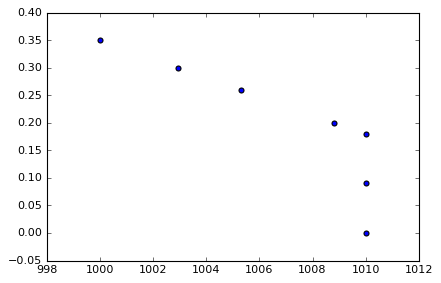

In [90]:
plt.scatter(ρ, y)
#plt.plot(rhos, np.linspace(0, 0.35, 50))

In [91]:
def ajuste_exp(x, a, b, c):
    return a + b*np.exp(c*x)

In [184]:
popt = np.array([1010.009, -0.009, 20.])

In [185]:
rhos = ajuste_exp(np.linspace(0, 0.35, 50), *popt)

(0.0, 0.4)

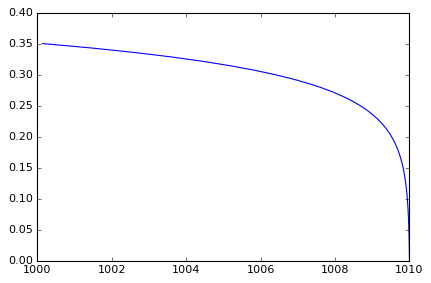

In [186]:
plt.plot(rhos, np.linspace(0, 0.35, 50))
plt.ylim(0.0, 0.4)

In [99]:
opt.curve_fit(ajuste_exp, ρ, y, x0)

RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 800.

In [26]:
rhos = np.zeros(256)
y_s = np.linspace(0, 0.35, 50)

for i in range(0, 50):
    
    rhos[i] = ajuste_cubico(y_s[i], popt)

0.0
0.00714285714286
0.0142857142857
0.0214285714286
0.0285714285714
0.0357142857143
0.0428571428571
0.05
0.0571428571429
0.0642857142857
0.0714285714286
0.0785714285714
0.0857142857143
0.0928571428571
0.1
0.107142857143
0.114285714286
0.121428571429
0.128571428571
0.135714285714
0.142857142857
0.15
0.157142857143
0.164285714286
0.171428571429
0.178571428571
0.185714285714
0.192857142857
0.2
0.207142857143
0.214285714286
0.221428571429
0.228571428571
0.235714285714
0.242857142857
0.25
0.257142857143
0.264285714286
0.271428571429
0.278571428571
0.285714285714
0.292857142857
0.3
0.307142857143
0.314285714286
0.321428571429
0.328571428571
0.335714285714
0.342857142857
0.35
